<a href="https://colab.research.google.com/github/faruk17035/Deep-Learning-Models/blob/main/18_Stock_Price_Prediction_using_LSTM_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the basic libraries reqired for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pandas_datareader as pdr
%matplotlib
%matplotlib inline

Using matplotlib backend: agg


In [2]:
#reading the dataset required for our project
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/stock.csv', date_parser = True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [5]:

#displaying the names of columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
#displaying if there are any blanks or na values
df.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [7]:
#displaying basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


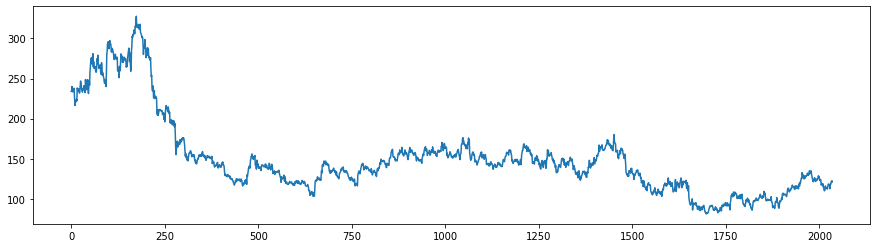

In [9]:
#plotting a graph
df['Open'].plot(figsize=(15,4))

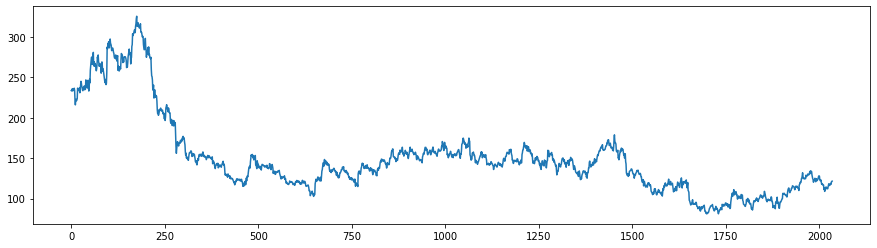

In [10]:

df['Close'].plot(figsize=(15,4))

In [11]:
#7 day rolling mean
df.rolling(7).mean().head(15)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


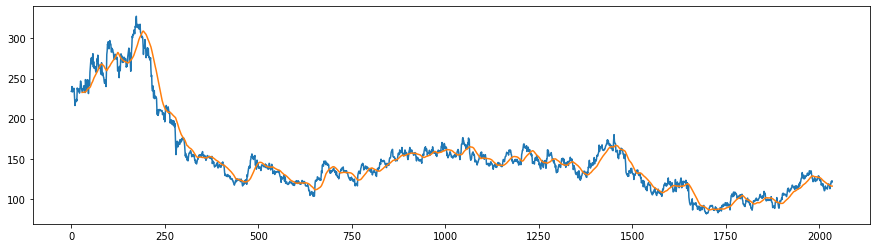

In [12]:
df['Open'].plot(figsize=(15,4))
df.rolling(window=30).mean()['Close'].plot()

Pandas reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.

In [13]:
df1 = df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [14]:
#transforming features to set range - Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [16]:
df1.shape

(2035, 1)

In [17]:
#splitting dataset into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [18]:
training_size, test_size

(1322, 713)

In [19]:
import numpy
#converting array of values into dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [20]:
#reshaping the data into X = t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [23]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [25]:
#reshaping the input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
X_train.shape

(1221, 100, 1)

In [27]:
#creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## epoch 100 chalaiyo pore

In [30]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
20/20 [==============================] - 13s 154ms/step - loss: 0.0408 - val_loss: 0.0028
Epoch 2/10
20/20 [==============================] - 2s 81ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 3/10
20/20 [==============================] - 2s 82ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/10
20/20 [==============================] - 2s 81ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/10
20/20 [==============================] - 2s 81ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/10
20/20 [==============================] - 2s 80ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/10
20/20 [==============================] - 2s 80ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 8/10
20/20 [==============================] - 2s 81ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
20/20 [==============================] - 2s 80ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/10
20/20 [==============================] - 2s 81ms/step - loss: 0.0011 - val_loss: 9.6536e-04


In [31]:
#prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [33]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

164.13518750956592

In [34]:
math.sqrt(mean_squared_error(ytest, test_predict))

118.46452688951784

In [35]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [36]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1)-1, :] = test_predict

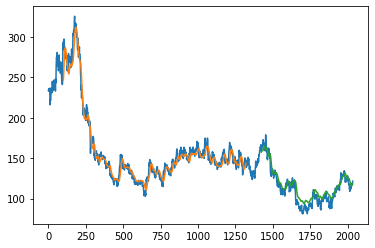

In [37]:
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

713

In [39]:
x_input = test_data[612:].reshape(1, -1)
x_input.shape

(1, 101)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
len(temp_input)

101

In [44]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):

  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)

0 day input [0.12479575 0.13848039 0.14011438 0.13888889 0.13541667 0.14011438
 0.1380719  0.13071895 0.13071895 0.12867647 0.11846405 0.14644608
 0.14808007 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157
 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.135

In [45]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [46]:
len(df1)

2035

In [47]:
df3 = df1.tolist()
df3.extend(lst_output)

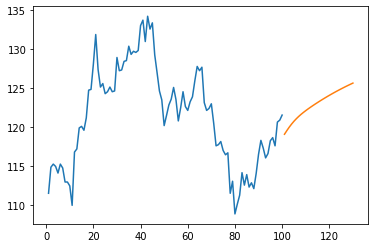

In [49]:
plt.plot(day_new, sc.inverse_transform(df1[1935:]))
plt.plot(day_pred, sc.inverse_transform(lst_output))

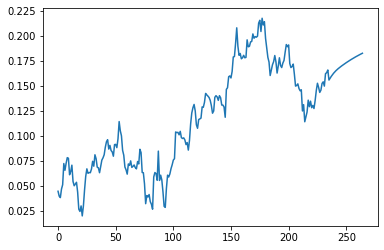

In [53]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1800:])

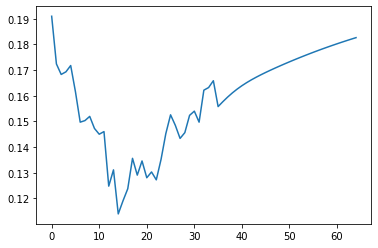

In [52]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

## Decision Tree

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [56]:
df4 = df[['Close']]
df4.head(5)

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30


In [57]:
df4 = df[['Close']]
df4.head(5)

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30


In [60]:
future_days1 = 30
df4['prediction'] = df4[['Close']].shift(-future_days1)
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,prediction
0,233.75,234.55
1,233.25,233.55
2,234.25,237.30
3,236.10,236.35
4,233.30,237.60


In [61]:
X = np.array(df4.drop(['prediction'],1))[:-future_days1]
print(X)

[[233.75]
 [233.25]
 [234.25]
 ...
 [122.15]
 [122.4 ]
 [123.  ]]


In [62]:
y = np.array(df4['prediction'])[:-future_days1]
print(y)

[234.55 233.55 237.3  ... 120.65 120.9  121.55]


In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [64]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [65]:
x_future = df4.drop(['prediction'], 1)[:-future_days1]
x_future = x_future.tail(future_days1)
x_future = np.array(x_future)
x_future

array([[133.75],
       [131.  ],
       [134.25],
       [132.6 ],
       [133.4 ],
       [129.3 ],
       [127.  ],
       [124.65],
       [123.5 ],
       [120.2 ],
       [121.5 ],
       [122.85],
       [123.6 ],
       [125.1 ],
       [123.55],
       [120.8 ],
       [122.5 ],
       [124.55],
       [122.65],
       [122.15],
       [123.25],
       [123.9 ],
       [125.95],
       [127.8 ],
       [127.25],
       [127.7 ],
       [123.15],
       [122.15],
       [122.4 ],
       [123.  ]])

In [66]:
## Decision Tree
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Logistics Regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[141.05       122.23333333 117.75       118.5125     146.8
 129.85       116.825      117.55       142.05       114.55
 110.1        111.25       114.15       112.55       123.45
 102.175      127.425      119.15       114.05       118.575
 118.3        134.7        116.05       131.         119.6
 118.65       125.725      118.575      116.85       121.55      ]

[133.19247181 130.65841576 133.65320928 132.13277565 132.86995559
 129.09190839 126.97251606 124.80704998 123.74735381 120.70648655
 121.90440396 123.14839511 123.8395013  125.22171369 123.79342756
 121.25937151 122.82587888 124.71490248 122.96410012 122.50336266
 123.51698508 124.11594378 126.00496738 127.709696   127.20288479
 127.6175485  123.42483759 122.50336266 122.73373139 123.28661635]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


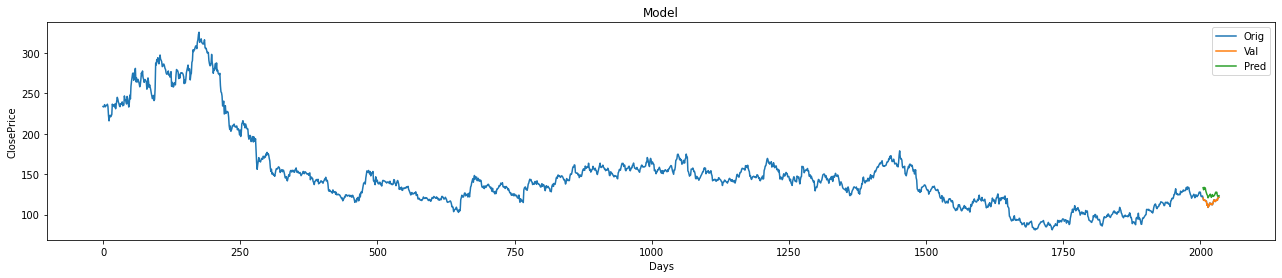

In [68]:
predictions = lr_prediction

valid = df4[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (22,4))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('ClosePrice')
plt.plot(df4['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()